In [1]:
import torch
from pathlib import Path
import requests
import pickle
import gzip
import matplotlib
import numpy as np
from matplotlib import pyplot
import math

In [2]:
DATA_PATH = Path("data_alt")
PATH = DATA_PATH / "mnist"

In [3]:
PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [4]:
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

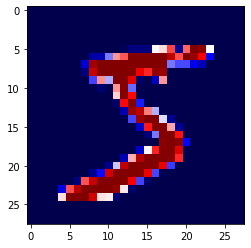

In [5]:
pyplot.imshow(x_train[0].reshape((28, 28)), cmap = 'seismic')

In [6]:
x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


In [7]:
weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [8]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)

In [9]:
bs = 64
xb = x_train[0:bs]
preds = model(xb)
#preds[0], preds.shape
print(preds[0], preds.shape)

tensor([-2.2352, -3.0629, -2.3412, -1.8450, -2.2224, -2.2050, -2.5068, -2.7520,
        -1.8862, -2.5710], grad_fn=<SelectBackward>) torch.Size([64, 10])


In [10]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [11]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.2573, grad_fn=<NegBackward>)


In [14]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [84]:
print(accuracy(preds, yb))

tensor(0.0781)


In [82]:
print(loss_func(preds, yb).shape)

torch.Size([64, 10])


In [12]:
from IPython.core.debugger import set_trace

lr = 0.5  # learning rate
epochs = 10  # how many epochs to train for

for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        #         set_trace()
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

In [15]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0555, grad_fn=<NegBackward>) tensor(1.)
